In [86]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import scipy
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [54]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [128]:
s_df = pd.read_csv('Research_Data/preprocessed_df.csv',usecols=            ['Score',
                                                                             'intensityMean',
                                                                            'intensityMin',
                                                                            'intensityMax',
                                                                            'max_pitch',
                                                                            'mean_pitch',
                                                                            'min_pitch',
                                                                            'diffPitchMaxMean',
                                                                            'f1STD',
                                                                            'f3STD',
                                                                            'f2STDf1'])

In [121]:
SSCALER = StandardScaler()
s_df.iloc[:,1:] = SSCALER.fit_transform(s_df.iloc[:,1:])

In [41]:
X = s_df.iloc[:,1:]
Y = s_df.iloc[:,0]
train_x,text_x,train_y,test_y = train_test_split(X,Y)

# Ridge Tunning

In [72]:
tuned_parameters = {'alpha':np.arange(0,3.5,0.2),
                    
              'solver':['svd','cholesky','lsqr','sparse_cg','sag','saga']
                   }


Model_Under_Optimization = GridSearchCV(
        Ridge(), tuned_parameters, scoring='neg_mean_squared_error',verbose=0
    )

Model_Under_Optimization.fit(train_x, train_y)

C:\Users\tomas\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.45916e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\tomas\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.39332e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\tomas\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.35206e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\tomas\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.63013e-17): result may not be accurate.
  overwrite_a=True).T


GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4]),
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [73]:
print(Model_Under_Optimization.best_params_)


{'alpha': 3.4000000000000004, 'solver': 'lsqr'}


In [74]:
means = Model_Under_Optimization.cv_results_['mean_test_score']
stds  = Model_Under_Optimization.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, Model_Under_Optimization.cv_results_['params']):
    print("Average F1-Score : [%0.3f] | (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Average F1-Score : [-0.031] | (+/-0.007) for {'alpha': 0.0, 'solver': 'svd'}
Average F1-Score : [-0.030] | (+/-0.006) for {'alpha': 0.0, 'solver': 'cholesky'}
Average F1-Score : [-0.030] | (+/-0.006) for {'alpha': 0.0, 'solver': 'lsqr'}
Average F1-Score : [-0.030] | (+/-0.006) for {'alpha': 0.0, 'solver': 'sparse_cg'}
Average F1-Score : [-0.030] | (+/-0.006) for {'alpha': 0.0, 'solver': 'sag'}
Average F1-Score : [-0.030] | (+/-0.007) for {'alpha': 0.0, 'solver': 'saga'}
Average F1-Score : [-0.030] | (+/-0.007) for {'alpha': 0.2, 'solver': 'svd'}
Average F1-Score : [-0.030] | (+/-0.007) for {'alpha': 0.2, 'solver': 'cholesky'}
Average F1-Score : [-0.030] | (+/-0.007) for {'alpha': 0.2, 'solver': 'lsqr'}
Average F1-Score : [-0.030] | (+/-0.007) for {'alpha': 0.2, 'solver': 'sparse_cg'}
Average F1-Score : [-0.030] | (+/-0.007) for {'alpha': 0.2, 'solver': 'sag'}
Average F1-Score : [-0.030] | (+/-0.007) for {'alpha': 0.2, 'solver': 'saga'}
Average F1-Score : [-0.030] | (+/-0.007) for {'alp

# Random Forest Tunning

In [77]:
tuned_parameters = [{'n_estimators': [2,20,100,300,700],
                     'criterion': ['mse','mae'],
                     'min_samples_leaf': [1, 10, 100, 1000]}
                   ]


Model_Under_Optimization = GridSearchCV(
        RandomForestRegressor(), tuned_parameters, scoring='neg_mean_squared_error',verbose=1
    )

Model_Under_Optimization.fit(train_x, train_y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   53.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [78]:
print(Model_Under_Optimization.best_params_)


{'criterion': 'mse', 'min_samples_leaf': 10, 'n_estimators': 100}


In [79]:
means = Model_Under_Optimization.cv_results_['mean_test_score']
stds  = Model_Under_Optimization.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, Model_Under_Optimization.cv_results_['params']):
    print("Average F1-Score : [%0.3f] | (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Average F1-Score : [-0.042] | (+/-0.025) for {'criterion': 'mse', 'min_samples_leaf': 1, 'n_estimators': 2}
Average F1-Score : [-0.030] | (+/-0.005) for {'criterion': 'mse', 'min_samples_leaf': 1, 'n_estimators': 20}
Average F1-Score : [-0.030] | (+/-0.006) for {'criterion': 'mse', 'min_samples_leaf': 1, 'n_estimators': 100}
Average F1-Score : [-0.029] | (+/-0.006) for {'criterion': 'mse', 'min_samples_leaf': 1, 'n_estimators': 300}
Average F1-Score : [-0.029] | (+/-0.006) for {'criterion': 'mse', 'min_samples_leaf': 1, 'n_estimators': 700}
Average F1-Score : [-0.032] | (+/-0.007) for {'criterion': 'mse', 'min_samples_leaf': 10, 'n_estimators': 2}
Average F1-Score : [-0.029] | (+/-0.006) for {'criterion': 'mse', 'min_samples_leaf': 10, 'n_estimators': 20}
Average F1-Score : [-0.028] | (+/-0.005) for {'criterion': 'mse', 'min_samples_leaf': 10, 'n_estimators': 100}
Average F1-Score : [-0.028] | (+/-0.006) for {'criterion': 'mse', 'min_samples_leaf': 10, 'n_estimators': 300}
Average F1-S

In [83]:
optimised_RandomForest = Model_Under_Optimization.best_estimator_


In [87]:
optimised_RandomForest.fit(X,Y)
with open('optimzed_RF.pkl','wb') as file:
    pickle.dump(optimised_RandomForest,file)

In [94]:
print("Self Tested RMSE of RFR: ",np.sqrt(((optimised_RandomForest.predict(X)-Y)**2).sum()))

Self Tested RMSE of RFR:  1.6369114676114538


# Optimizing XGBoost

In [106]:
tuned_parameters= {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': np.arange(0,1,0.1),
              'colsample_bytree': [0.7],
              'n_estimators': [500],
                'verbosity':[0]}



Model_Under_Optimization = GridSearchCV(
        XGBRegressor(), tuned_parameters, scoring='neg_mean_squared_error',verbose=1
    )

Model_Under_Optimization.fit(train_x, train_y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_est...
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['

In [104]:
print(Model_Under_Optimization.best_params_)


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7, 'verbosity': 0}


In [107]:
means = Model_Under_Optimization.cv_results_['mean_test_score']
stds  = Model_Under_Optimization.cv_results_['std_test_score']

print('Lowest Average RMSE: ',np.min(means))

Lowest Average RMSE:  -0.04273722678788129


In [108]:

for mean, std, params in zip(means, stds, Model_Under_Optimization.cv_results_['params']):
    print("Average F1-Score : [%0.3f] | (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Average F1-Score : [-0.043] | (+/-0.017) for {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.0, 'verbosity': 0}
Average F1-Score : [-0.029] | (+/-0.010) for {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.1, 'verbosity': 0}
Average F1-Score : [-0.031] | (+/-0.003) for {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.2, 'verbosity': 0}
Average F1-Score : [-0.031] | (+/-0.005) for {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.30000000000000004, 'verbosi

In [109]:
optimised_XGB = Model_Under_Optimization.best_estimator_


In [110]:
optimised_XGB.fit(X,Y)
with open('optimzed_XGB.pkl','wb') as file:
    pickle.dump(optimised_XGB,file)

In [111]:
print("Self Tested RMSE of RFR: ",np.sqrt(((optimised_XGB.predict(X)-Y)**2).sum()))

Self Tested RMSE of RFR:  1.492590424586023


In [130]:
with open('Standard_Scaler.pkl','wb') as file:
    pickle.dump(SSCALER,file)

In [142]:
with open('optimzed_XGB.pkl','rb') as file:
    loaded_model = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'optimzed_XGB.pkl'

# Momentum Function

In [398]:
score_samples = np.random.beta(a=5.4,b=3,size=100)
score_samples = score_samples[(score_samples>0) & (score_samples<1)]
score_samples = np.random.choice(score_samples,100,replace=False)
score_samples[:50] = score_samples[:50]-np.random.beta(a=4,b=30,size=50)
score_samples[50:] = score_samples[:50]+np.random.beta(a=4,b=30,size=50)

In [399]:
print('max: ',np.max(score_samples))
print('min: ',np.min(score_samples))

max:  0.9029147744149755
min:  0.07634907040366656


In [412]:
def plot_score(scores):
    fig,ax = plt.subplots(figsize=(12,7))
    sns.lineplot(x=range(1,101,1),y=scores,ax=ax)
    return ax

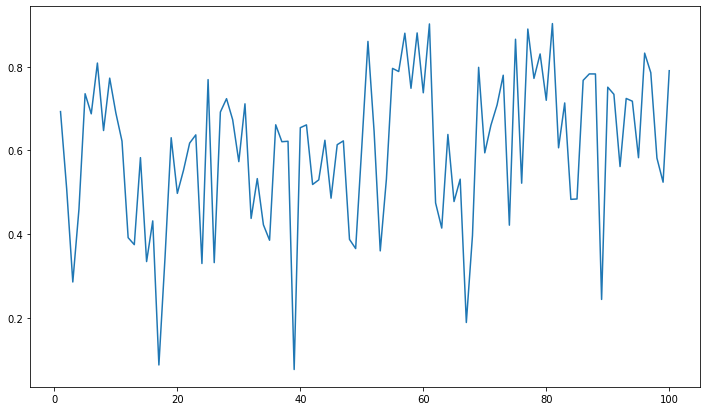

In [413]:
plot_score(score_samples)

In [414]:
np.mean(score_samples)

0.6017778608598487

In [459]:
from scipy.stats import linregress

tm = [0.5]
momentum = []
it = [0]

tm1 = 0.5

for x,s in enumerate(score_samples):
    M = (s-tm1)/1.2
    M = s-M
    momentum.append(M)
    tm1=M

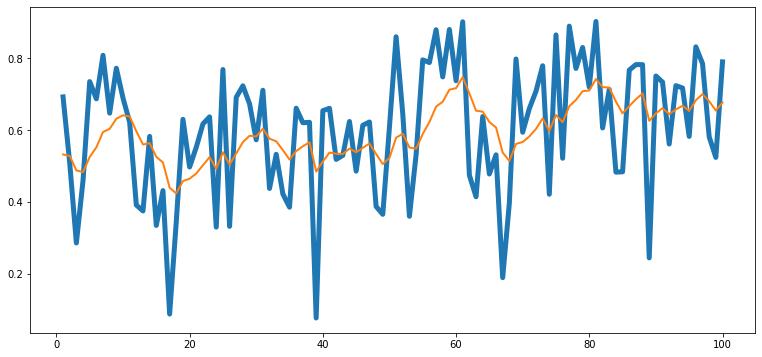

In [460]:
plt.figure(figsize=(13,6))
sns.lineplot(x=range(1,101,1),y=score_samples,lw=5)
sns.lineplot(x=range(1,101,1),y=momentum,lw=2)
